# Paca domowa nr 4 Warsztaty Badawcze

#### Filip Szympliński, 313513

## Wczytanie pakietów i danych

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, roc_curve, recall_score, precision_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error, r2_score, median_absolute_error
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score
import dalex as dx

import warnings
warnings.filterwarnings('ignore')

# ustawia domyślną wielkość wykresów
plt.rcParams['figure.figsize'] = (12,8)
# to samo tylko dla tekstu
plt.rcParams['font.size'] = 16

In [3]:
planes_train = pd.read_csv("../HW2/data/airline_passenger_satisfaction/train.csv")
planes_train = planes_train.drop(labels=["Unnamed: 0", "id"], axis=1)

## Preprocessing (z pracy domowej nr 2)

In [4]:
planes_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


### Przekształcanie kolumn

In [5]:
col_name = "Arrival Delay in Minutes"
planes_train.loc[planes_train[col_name].isna(),col_name] = planes_train[col_name].mean()

### Kodowanie kolumn

In [6]:
planes_train.loc[planes_train["satisfaction"]=="satisfied", "satisfaction"] = 1
planes_train.loc[planes_train["satisfaction"]=="neutral or dissatisfied", "satisfaction"] = 0

planes_train['Gender'] = (planes_train['Gender'] == 'Female')*1
planes_train['Customer Type'] = (planes_train['Customer Type'] == 'Loyal Customer')*1
planes_train['Type of Travel'] = (planes_train['Type of Travel'] == 'Personal Travel')*1
planes_train.loc[planes_train["Class"]=="Eco", "Class"] = 0
planes_train.loc[planes_train["Class"]=="Eco Plus", "Class"] = 1
planes_train.loc[planes_train["Class"]=="Business", "Class"] = 2

In [28]:
planes_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,13,1,1,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,0,25,0,2,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,1,26,0,2,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,1,25,0,2,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,1,61,0,2,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,1,0,23,0,0,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
103900,0,1,49,0,2,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,0,0,30,0,2,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
103902,1,0,22,0,0,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


## Modelowanie

In [7]:
y = planes_train['satisfaction']
y = y.astype('int')
X = planes_train.drop("satisfaction", axis = 1)
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=420, test_size=0.125)

In [8]:
def show_model_metrics(model, X_val, y_val):
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)
    print(f"F1 score: {f1_score(y_val, y_pred, average=None)}")
    print(f"Precision score: {precision_score(y_val, y_pred, average=None)}")
    print(f"Recall score: {recall_score(y_val, y_pred, average=None)}")
    print(f"Accuracy score: {accuracy_score(y_val, y_pred)}")
    print(f"ROC AUC score: {roc_auc_score(y_val, y_pred, average=None)}")

In [9]:
model = RandomForestClassifier(random_state=2022,
                               n_jobs=-1,
                               n_estimators=20,
                               max_depth=6)
model.fit(X_train, y_train)
show_model_metrics(model, X_val, y_val)
cross_val_score(model, X_train, y_train, cv=5)

F1 score: [0.93496916 0.91229656]
Precision score: [0.92602922 0.92433126]
Recall score: [0.9440834  0.90057122]
Accuracy score: 0.9253156760086233
ROC AUC score: 0.922327312795815


array([0.92757369, 0.93015454, 0.92663477, 0.92899962, 0.92476489])

Widać tutaj, że predykcyjność jest dobra zarówno dla zadowolonych i niezadowolonych pasażerów, ale to nie jest temat naszych rozważań. Mimo to możemy być już bardziej pewni co do wyciągniętych poźniej wziosków, ponieważ działamy na modelu który w sporym stopniu jest dobry.

## XAI

### Feature importances

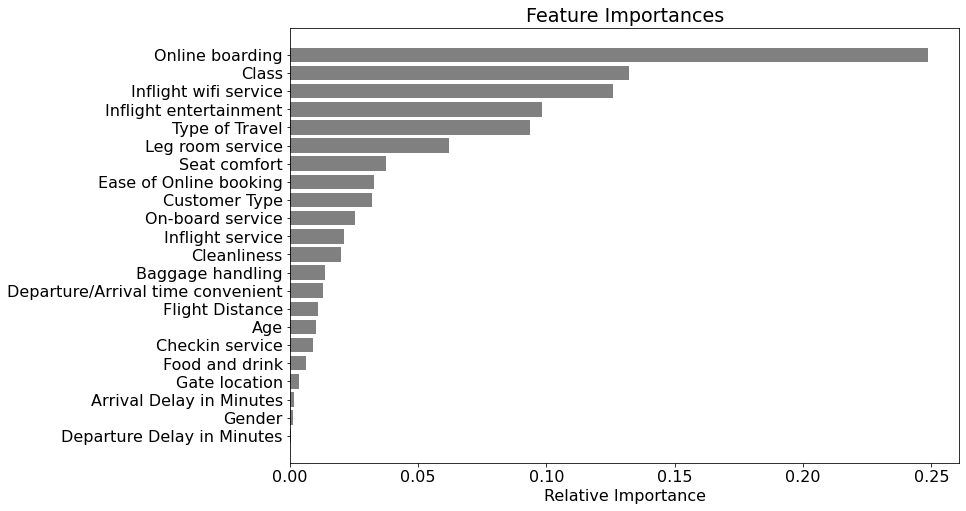

In [52]:
importances = model.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='gray', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Z powyższego wykresu widać, że najważniejsze zmienne to `Online boarding`, `Class` oraz `Inflight wifi service`.

In [53]:
import shap

In [54]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_val)

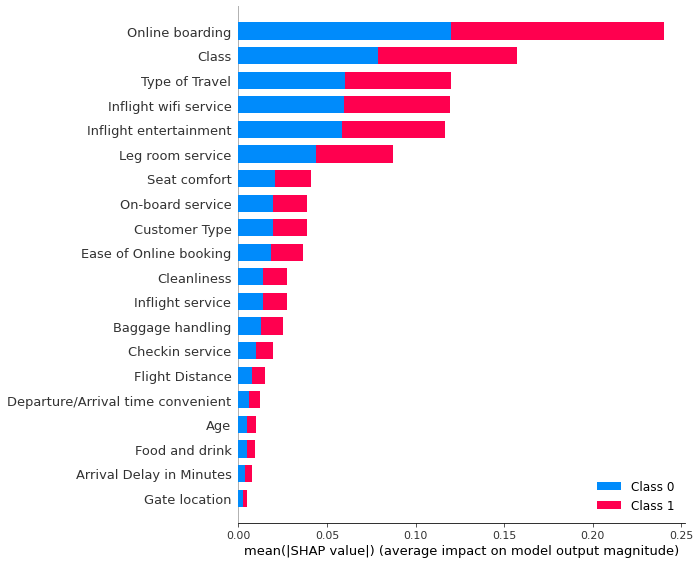

In [55]:
shap.summary_plot(shap_values, X.values, plot_type="bar",
                  feature_names = X.columns)

Patrząc na istotność zmiennych według SHAP values, to w czołówce jedyna zmiana jaka nastąpiła, to zmienna `Type of travel` podskoczyła o 2 pozycje do góry. Widać tutaj także że takie rzeczy jak wiek czy płeć nie mają większego znaczenia i możnaby rozważyć pominięcie tych zmiennych, aby model nie uwględniał zmiennych, których stosowność zastosowania jest mocno dykusyjna. Na powyższaym wykresie stosunek koloru niebieskiego oraz czerwonego nie ma znaczenia, ponieważ mamy do czynienia z klasyfikacją binarną, więc stosunek kolorów będzie wszędzie taki sam.

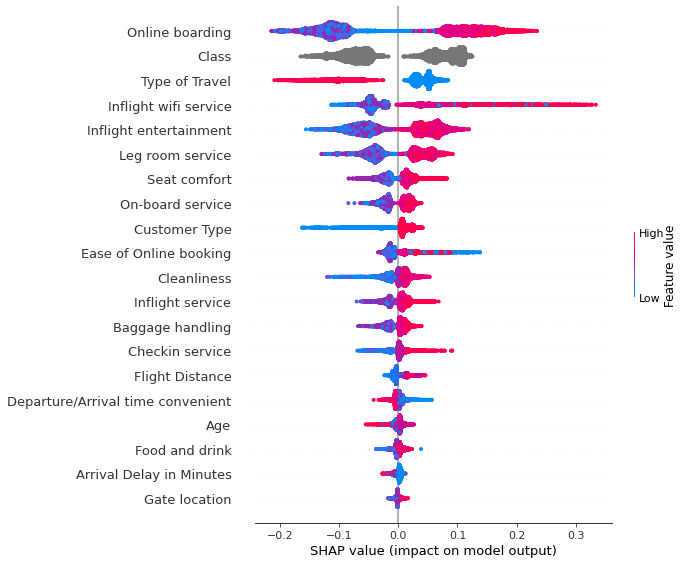

In [58]:
shap.summary_plot(shap_values[1], X_val)

Z powyższego wykresu widać, że de facto dla większości zmiennych im większa wartość, tym większa satysfakcja z lotu. W tych przypadkach większa wartość oznacza lepiej. Dla zmiennaj `Class` nie wiem czemu punkty nie zostaly pokolorowane, a dla zmiennej `Type of Travel` mamy odwrotną korelację. Tzn dla wartości 1 pasażerowie są mniej zadowoleni (podróże prywatne), natomiast dla wartości 0 (podróże biznesowe) klienci są częściej zadowoleni. Im dane zmienne mają mniejsze znaczenie dla modelu, to widać, że podział punktów czzerwonych i niebieskich już nie jest tak bardzo wyraźny.

### Spojrzenie na pojedynczych pasażerów

In [46]:
X_train.mean()

Gender                                  0.508062
Customer Type                           0.816930
Age                                    39.377183
Type of Travel                          0.311309
Class                                   1.027080
Flight Distance                      1189.411996
Inflight wifi service                   2.727826
Departure/Arrival time convenient       3.058868
Ease of Online booking                  2.755555
Gate location                           2.975956
Food and drink                          3.204837
Online boarding                         3.251705
Seat comfort                            3.441495
Inflight entertainment                  3.359981
On-board service                        3.381605
Leg room service                        3.352842
Baggage handling                        3.631946
Checkin service                         3.305161
Inflight service                        3.641405
Cleanliness                             3.286891
Departure Delay in M

#### Zadowolony pasażer

In [35]:
X_val.iloc[[0]]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
99120,0,1,60,0,2,2583,3,3,3,3,...,5,4,4,4,4,3,4,3,0,0.0


In [36]:
sample = X_val.iloc[[0]]
shap_values = explainer.shap_values(sample)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], sample)

W powyższym przykładzie zmienna zaznaczone na czerwono (pozytywny wpływ) mają większe warości nie średnie (na plus), co skutkuje większą satysfakcją klienta.

---

#### Niezadowolony pasażer

In [37]:
X_val.iloc[[2]]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
67704,1,1,54,1,0,770,2,5,2,2,...,4,4,4,2,1,4,4,3,5,2.0


In [38]:
sample = X_val.iloc[[2]]
shap_values = explainer.shap_values(sample)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], sample)

W tym przypadku natomista większość zmiennych zaznaczonych na niebiesko ma mniejsze wartości niż średnie (na minus), co skutkuje mniejszym zadowoleniem klienta.

---

In [39]:
exp = dx.Explainer(model, X, y)

Preparation of a new explainer is initiated

  -> data              : 103904 rows 22 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 103904 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7f72a249cf70> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.02, mean = 0.433, max = 0.98
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.961, mean = -4.59e-06, max = 0.949
  -> model_info        : package sklearn

A new explainer has been created!


In [40]:
satisfied = pd.DataFrame(X_val.iloc[[0]])

In [41]:
unsatisfied = pd.DataFrame(X_val.iloc[[2]])

In [42]:
bd_satisfied = exp.predict_parts(satisfied, type='break_down_interactions', label='satisfied')
bd_unsatisfied = exp.predict_parts(unsatisfied, type='break_down', label='unsatisfied')

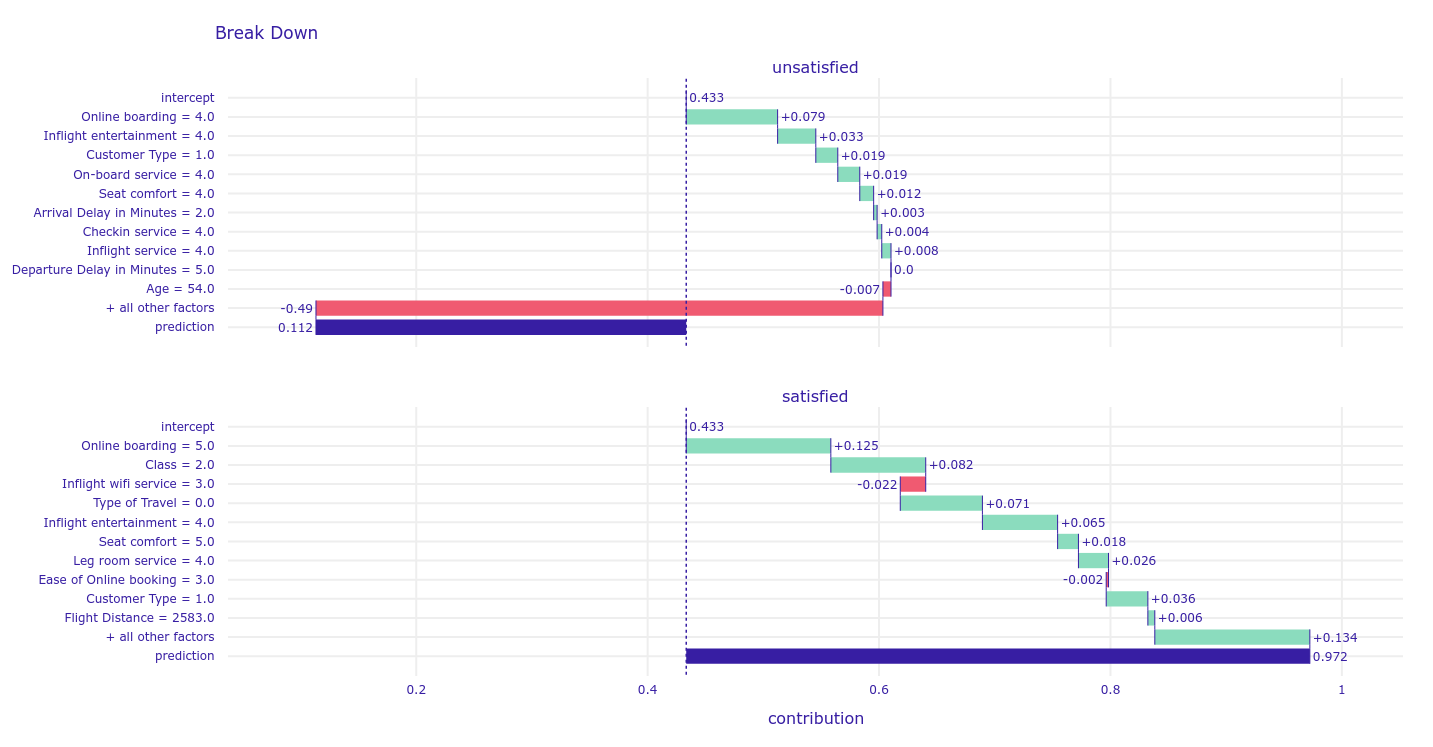

In [43]:
bd_unsatisfied.plot(bd_satisfied)

Powyżesze wykresy prezentją de facto to co było wcześniej, tylko innej formie. Niestety nie widać jakie konkretnie zmienne spowodowały to, że pasażer niezadowolony faktycznie był niezadowolony, bowiem zmiennej są te opisane grupowo jako all other factors.